<a href="https://colab.research.google.com/github/Shreyagrg888/Worksheets/blob/main/Shreya_Gurung_Worksheet_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#import necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv(r"/content/drive/MyDrive/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#Regression Task
X = df.drop(columns = ['BloodPressure', 'Outcome', 'Pregnancies', 'Age'], axis = 1)
y = df['BloodPressure']
X.shape


(768, 5)

In [6]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, shuffle = True)

In [7]:
#Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled[0:5]


array([[-0.35597359,  0.52002312,  0.41124648,  0.03730022,  0.74345815],
       [ 0.7329653 ,  1.56712706,  0.8956415 ,  1.73576221, -0.38775689],
       [ 0.25255108,  0.33524008,  1.11582105,  0.13648048,  0.4100146 ],
       [ 1.91798703,  0.95118357,  3.66990388, -0.24784304,  0.48480568],
       [ 0.70093769,  0.76640052,  0.5961973 ,  0.55799659, -0.64017678]])

In [8]:
#Regression model
model = LinearRegression()
#Train the model
model.fit(X_train_scaled, y_train)
#Predict the outcomes
y_pred =model.predict(X_test_scaled)



In [9]:
#Model evaluation
mean_squared_error = mean_squared_error(y_test, y_pred)
print(f"The mean squared error is: {mean_squared_error}")
print(f"The root mean square error is: {np.sqrt(mean_squared_error)}")
r2_score = r2_score(y_test, y_pred)
print(f"The r2 score of the model is: {r2_score}")

The mean squared error is: 252.26269380029598
The root mean square error is: 15.88277978819501
The r2 score of the model is: 0.13602373871425966


In [10]:
#Model parameters
print(f"Coefficient (Slope): {model.coef_}")
print(f"Intercept: {model.intercept_}")

Coefficient (Slope): [ 1.34552192  2.9937118  -0.29932905  3.83400979 -0.92734918]
Intercept: 68.64756944444444


<Axes: title={'center': 'Actual vs Predicted'}, xlabel='y_test', ylabel='y_pred'>

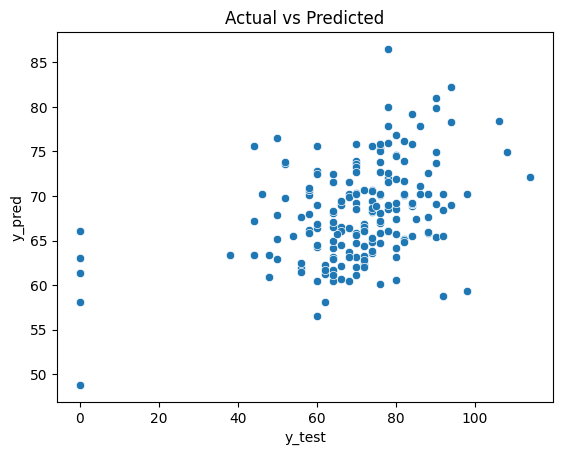

In [11]:
# Create a new dataframe with y_test and y_pred
results_df = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})

# Plot the actual vs predicted values
plt.title("Actual vs Predicted")
sns.scatterplot(x='y_test', y='y_pred', data=results_df)

In [12]:
#Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score



In [13]:
#Classification Task
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [15]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [16]:

X = df.drop('Outcome', axis = 1)
y = df['Outcome']

In [17]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42, test_size= 0.25)

In [18]:
#Standardization
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_test_scaled.shape


(192, 8)

In [19]:
#Model Training
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)


In [20]:
#Model evaluation
print(f"The accuracy of the model is: {accuracy_score(y_test, y_pred)}")
print(f"precision_score is: {precision_score(y_test, y_pred)}")
print(f"Recall score is: {recall_score(y_test, y_pred)}")

The accuracy of the model is: 0.7291666666666666
precision_score is: 0.6164383561643836
Recall score is: 0.6521739130434783


In [21]:
#Confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix_df = pd.DataFrame(confusion_matrix, columns = ["TP", "FN"], index = ["FP", "TN"])
confusion_matrix_df

,TP,FN
FP,95,28
TN,24,45


In [22]:
#roc-auc curve
roc_auc_score(y_test, y_pred)

0.7122658183103571

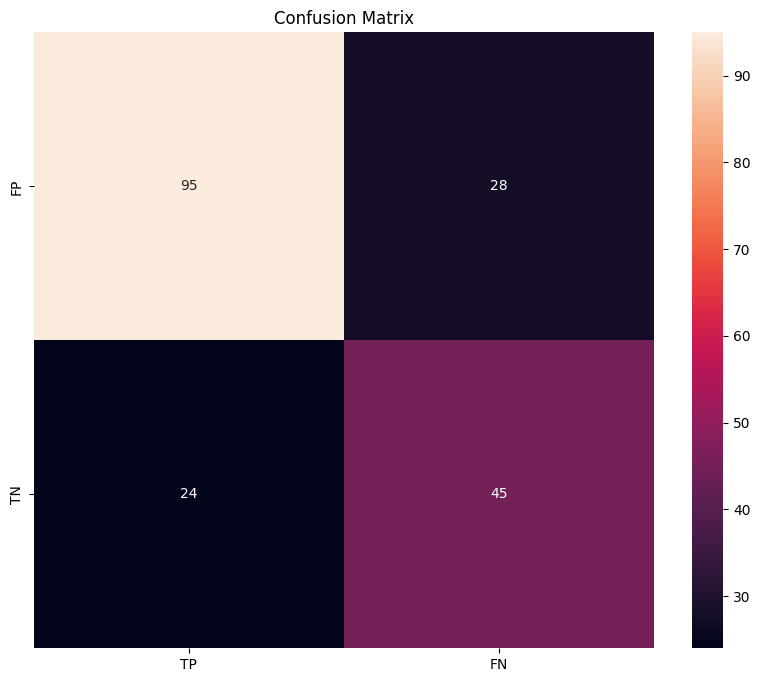

In [23]:
#Confusion matrix visualization
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix_df, annot= True, fmt='d')
plt.title("Confusion Matrix")
plt.show()


In [24]:
probabilities = model.predict_proba(X_test_scaled)
probabilities

array([[0.72565339, 0.27434661],
       [0.80959626, 0.19040374],
       [0.88860446, 0.11139554],
       [0.84784941, 0.15215059],
       [0.51955171, 0.48044829],
       [0.55129124, 0.44870876],
       [0.98522944, 0.01477056],
       [0.39071643, 0.60928357],
       [0.43874083, 0.56125917],
       [0.21813936, 0.78186064],
       [0.74392009, 0.25607991],
       [0.09202896, 0.90797104],
       [0.63368171, 0.36631829],
       [0.71749291, 0.28250709],
       [0.92517398, 0.07482602],
       [0.62877295, 0.37122705],
       [0.86585218, 0.13414782],
       [0.92726533, 0.07273467],
       [0.14051786, 0.85948214],
       [0.43453975, 0.56546025],
       [0.79376039, 0.20623961],
       [0.92245889, 0.07754111],
       [0.46350797, 0.53649203],
       [0.90617837, 0.09382163],
       [0.45273051, 0.54726949],
       [0.10688396, 0.89311604],
       [0.87684878, 0.12315122],
       [0.96856359, 0.03143641],
       [0.7410881 , 0.2589119 ],
       [0.88780455, 0.11219545],
       [0.